# Notes

# Load Modules

In [3]:
library(SpatialPCA)
library(ggplot2)
library(slingshot)

Loading required package: princurve

Loading required package: TrajectoryUtils

Loading required package: SingleCellExperiment

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLog

# Load Data

In [ ]:
exp_df = read.csv("simulated_expression.csv", row.names = 1)
head(exp_df)

,cell1,cell2,cell3,cell4,cell5,cell6,cell7,cell8,cell9,cell10,⋯,cell991,cell992,cell993,cell994,cell995,cell996,cell997,cell998,cell999,cell1000
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
Burn1_TF1,2,2,8,6,5,2,7,1,3,4,⋯,4,2,3,6,2,4,2,3,8,4
Burn2_TF1,4,4,9,3,5,3,2,4,3,3,⋯,7,6,2,6,3,1,4,7,7,6
Burn3_TF1,4,1,6,3,2,3,5,2,4,4,⋯,8,5,5,2,3,5,4,6,7,2
Burn4_TF1,5,3,5,6,3,1,1,3,3,2,⋯,1,1,1,4,5,3,4,4,6,3
A1_TF1,2,4,8,4,1,2,4,3,2,2,⋯,5,1,2,2,3,3,3,4,5,0
A2_TF1,1,3,9,7,2,0,3,3,2,3,⋯,6,2,0,5,4,3,8,3,5,2


In [ ]:
meta_info_df = read.csv("full_simulation_data_with_noise.csv", row.names = 1)
head(meta_info_df)

,Sample,UMAP1,UMAP2,time,lineage,Cell_Type,r,theta,x,y
,<chr>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
cell562,Simulation,3.141247,6.648345,0.3252209,1,A,17.10844,92.38724,-0.7126208,17.093594
cell779,Simulation,3.083348,6.590264,0.4576187,1,A,20.29426,323.01210,16.2102930,-12.209964
cell637,Simulation,3.039063,6.706306,0.4598090,1,A,20.34276,184.81805,-20.2708827,-1.708626
cell168,Simulation,2.943072,6.653493,0.4919191,1,A,21.04108,250.84913,-6.9026702,-19.876627
cell393,Simulation,3.054525,6.533715,0.4919191,1,A,21.04108,162.40476,-20.0566922,6.360523
cell957,Simulation,3.067236,6.607126,0.6072474,1,A,23.37782,141.39118,-18.2680026,14.587760


In [17]:
xy_coods = as.matrix(meta_info_df[colnames(exp_df),c('x', 'y')])
head(xy_coods)

,x,y
cell1,-476.7610,621.2420
cell2,-342.3892,295.9027
cell3,696.1339,-134.7557
cell4,329.3906,-638.5099
cell5,610.3327,278.5673
cell6,740.6564,-100.9556


In [18]:
dim(exp_df)
dim(xy_coods)

[1]  135 1000

[1] 1000    2

# Create spatial PCA object

In [22]:
sim_data = CreateSpatialPCAObject(counts=as.matrix(exp_df), location=xy_coods, project = "SpatialPCA",gene.type="spatial",sparkversion="spark",numCores_spark=5,gene.number=3000, customGenelist=NULL,min.loctions = 2, min.features=2)


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Data is of class matrix. Coercing to dgCMatrix.”


## Use SCTransform function in Seurat to normalize data. 


Running SCTransform on assay: RNA

Running SCTransform on layer: counts

vst.flavor='v2' set. Using model with fixed slope and excluding poisson genes.

`vst.flavor` is set to 'v2' but could not find glmGamPoi installed.
Please install the glmGamPoi package for much faster estimation.
--------------------------------------------
install.packages('BiocManager')
BiocManager::install('glmGamPoi')
--------------------------------------------
Falling back to native (slower) implementation.


Variance stabilizing transformation of count matrix of size 134 by 1000

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 134 genes, 1000 cells

Warning message in glm.nb(formula = as.formula(new_formula), data = data):
“alternation limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in sqrt(1/i):
“NaNs produced”
Warning message in theta.ml(Y, mu, sum(w), w, limit 

## Use spark.test function in SPARK package to select spatially variable genes. 
## ===== SPARK INPUT INFORMATION ==== 
## number of total samples:  1000 
## number of total features:  93 
## number of adjusted covariates:  0 
# fitting normalized count-based spatial model under the null hypothesis ... 
## testing Gaussian kernel: 1...
## testing Periodic kernel: 1...
## testing Gaussian kernel: 2...
## testing Periodic kernel: 2...
## testing Gaussian kernel: 3...
## testing Periodic kernel: 3...
## testing Gaussian kernel: 4...
## testing Periodic kernel: 4...
## testing Gaussian kernel: 5...
## testing Periodic kernel: 5...
## Identified  18  spatial genes through spark.test function. 
The  number of significant spatial genes is less than the specified number of spatial genes. 
## Using  18  significant spatially variable genes. 


# Spatial PCA processing

In [23]:
sim_data = SpatialPCA_buildKernel(sim_data, kerneltype="gaussian", bandwidthtype="SJ",bandwidth.set.by.user=NULL)
sim_data = SpatialPCA_EstimateLoading(sim_data,fast=FALSE,SpatialPCnum=10) 
sim_data = SpatialPCA_SpatialPCs(sim_data, fast=FALSE)

## Selected kernel type is:  gaussian  
## The bandwidth is:  0.0988818206570601  
## Calculating kernel matrix
## Finished calculating kernel matrix.
[1] "Eigen decomposition on kernel matrix!"
[1] "Using all eigenvectors and eigenvalues in the Kernel matrix!"


In [26]:
round(sqrt(dim(sim_data@SpatialPCs)[2]))

[1] 32

In [49]:
clusterlabel= walktrap_clustering(clusternum=6,latent_dat=sim_data@SpatialPCs,knearest=32 ) 
# here for all 12 samples in LIBD, we set the same k nearest number in walktrap_clustering to be 70. 
# for other Visium or ST data, the user can also set k nearest number as round(sqrt(dim(SpatialPCAobject@SpatialPCs)[2])) by default


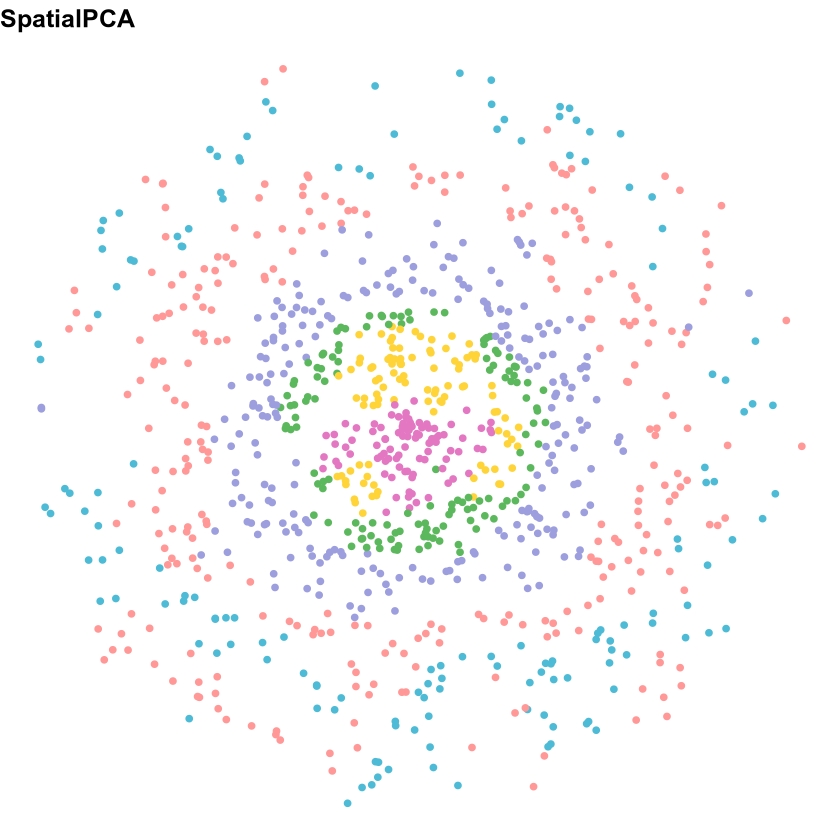

In [50]:
cbp=c("#9C9EDE" ,"#5CB85C" ,"#E377C2", "#4DBBD5" ,"#FED439" ,"#FF9896", "#FFDC91")
plot_cluster(location=xy_coods,clusterlabel=clusterlabel,pointsize=1.5,title_in=paste0("SpatialPCA"),color_in=cbp)

# Trajectory inference

                  Length Class              Mode   
clusterlabel      1000   factor             numeric
slingshot         1000   PseudotimeOrdering S4     
slingPseudotime_1 1000   -none-             numeric

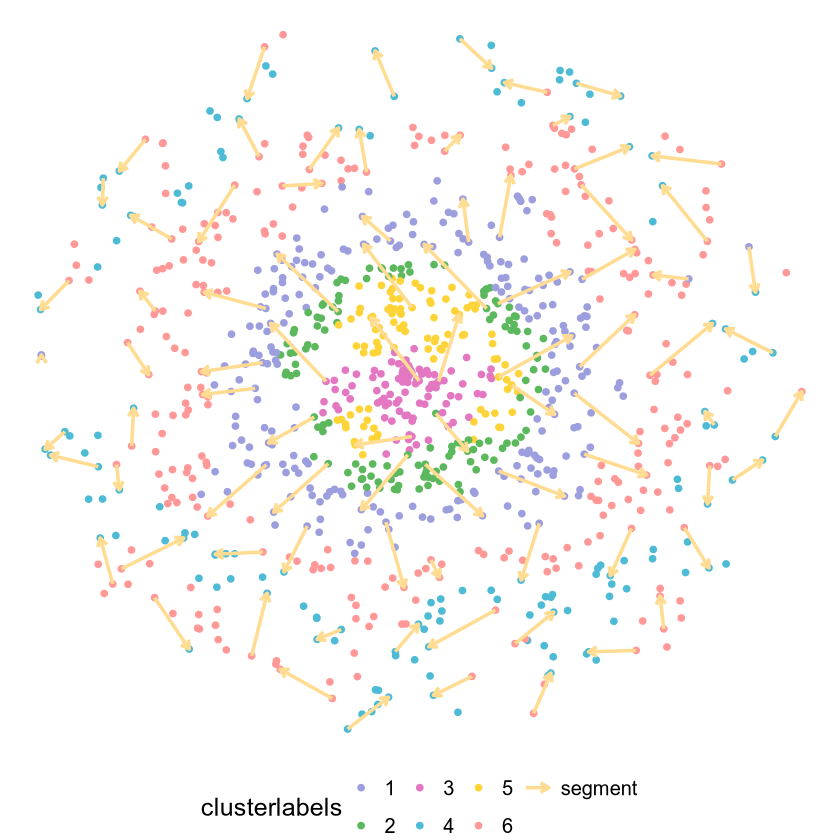

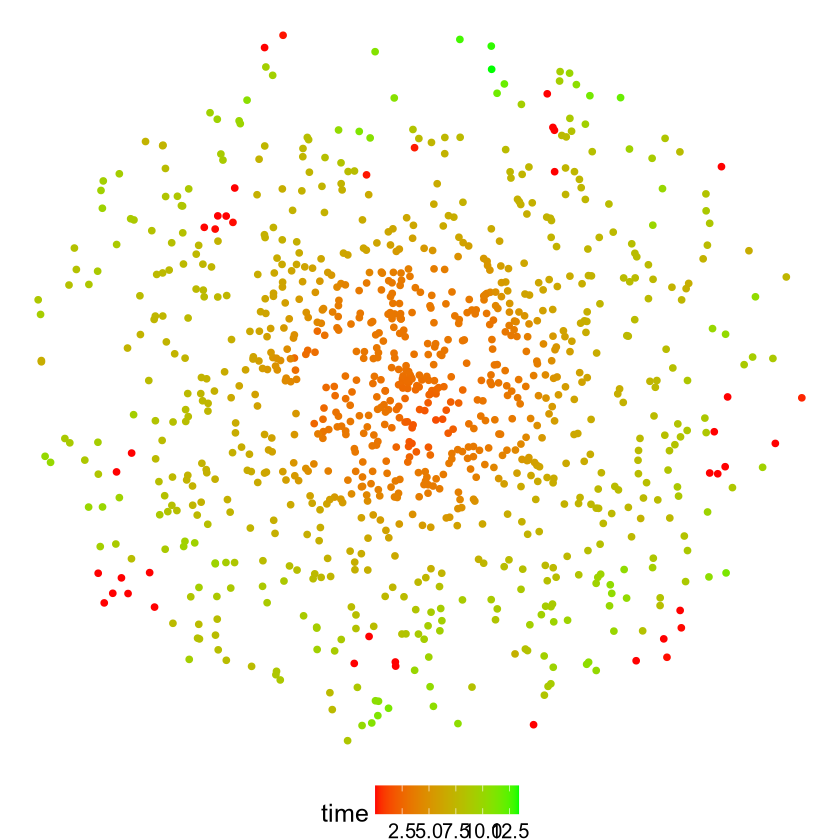

In [51]:
library(slingshot)
sim <- SingleCellExperiment(assays = as.matrix(exp_df))
reducedDims(sim) <- SimpleList(DRM = t(sim_data@SpatialPCs))
colData(sim)$clusterlabel <- factor(clusterlabel)    
sim  <-slingshot(sim, clusterLabels = 'clusterlabel', reducedDim = 'DRM',start.clus="3" ) 
# in this data we set white matter region as start cluster, one can change to their preferred start region 

summary(sim@colData@listData)
pseudotime_traj1 = sim@colData@listData$slingPseudotime_1 # in this data only one trajectory was inferred
gridnum = 10
color_in = c("#9C9EDE" ,"#5CB85C" ,"#E377C2", "#4DBBD5" ,"#FED439" ,"#FF9896", "#FFDC91","black")
p_traj1 = plot_trajectory(pseudotime_traj1, sim_data@location,clusterlabel,gridnum,color_in,pointsize=1.5 ,arrowlength=0.2,arrowsize=1,textsize=15 )
p_traj1$Arrowoverlay1
p_traj1$Pseudotime


In [52]:
length(pseudotime_traj1)

[1] 1000

In [55]:
sum(is.nan(pseudotime_traj1))

[1] 0

In [56]:
write.csv(pseudotime_traj1, "pseudotime_spatial_pca.csv")

In [4]:
sessionInfo()

R version 4.3.3 (2024-02-29)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /sc/arion/work/wangw32/conda-env/envs/spatialpca_env/lib/libopenblasp-r0.3.27.so;  LAPACK version 3.12.0

locale:
 [1] LC_CTYPE=en_US.utf8        LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: America/New_York
tzcode source: system (glibc)

attached base packages:
[1] stats4    stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] slingshot_2.10.0            TrajectoryUtils_1.10.1     
 [3] SingleCellExperiment_1.22.0 SummarizedExperiment_1.30.2
 [5] Biobase_2.60.0              GenomicRanges_1.52.1       
 [7]